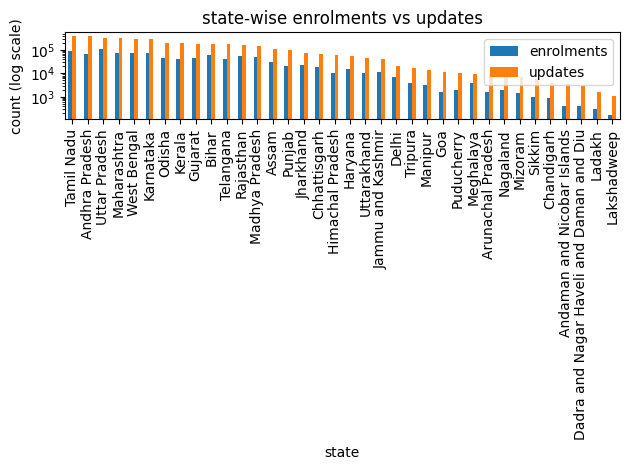

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

enrolments=enrolment_df.groupby("state").size()
updates=pd.concat([demographic_df,biometric_df]).groupby("state").size()

comparison=pd.DataFrame({
    "enrolments":enrolments,
    "updates":updates
}).fillna(0)

comparison.sort_values("updates",ascending=False).plot(kind="bar")

plt.yscale("log")
plt.xlabel("state")
plt.ylabel("count (log scale)")
plt.title("state-wise enrolments vs updates")
plt.tight_layout()
plt.show()
